In [ ]:
import pandas as pd
import numpy as np
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [ ]:
# Reading review with aspect JSONL file
data = pd.read_json(r'review_with_aspect.jsonl', lines=True)
data


,id,text,labels
0,ICLR_2020_1123,This work studies the predictive uncertainty i...,"[[0, 1029, summary], [1030, 1201, motivation_p..."
1,ICLR_2018_813,Summary : This paper proposes a new approach t...,"[[10, 1038, summary], [1054, 1082, motivation_..."
2,NIPS_2019_796,The paper proposes a graph neural network base...,"[[0, 469, summary], [470, 532, clarity_positiv..."
3,ICLR_2018_726,Summary : This paper proposes an encoder-decod...,"[[10, 599, summary], [870, 1076, substance_neg..."
4,NIPS_2016_477,The authors present sharp criteria for l_1-spa...,"[[0, 1223, summary], [1314, 1354, soundness_po..."
...,...,...,...
25981,ICLR_2020_610,"In this work , a novel inverse constraint lear...","[[0, 1166, summary], [1167, 1298, motivation_p..."
25982,ICLR_2017_378,I find the general direction of the work is pr...,"[[0, 53, motivation_positive], [112, 132, moti..."
25983,ICLR_2020_1164,This paper investigates the problem of learnin...,"[[0, 561, summary], [607, 644, clarity_positiv..."
25984,NIPS_2018_998,This paper considers a generalized version of ...,"[[0, 936, summary], [990, 1032, clarity_positi..."


In [ ]:
df = pd.DataFrame(data)

# Display basic information about the dataset
print("Basic Data Info:")
print(df.info())

# Check for missing data
print("\nMissing Data:")
print(df.isnull().sum())

# Descriptive statistics for text column length
df['text_length'] = df['text'].apply(len)
print("\nDescriptive Statistics of Text Length:")
print(df['text_length'].describe())

# The distribution of label categories
label_categories = [label[2] for sublist in df['labels'] for label in sublist]
label_df = pd.DataFrame(label_categories, columns=["label"])

print("\nDistribution of Label Categories:")
print(label_df['label'].value_counts())

# Number of aspects (labels) per item
df['num_labels'] = df['labels'].apply(len)
print("\nNumber of Labels per Paper:")
print(df[['id', 'num_labels']])

# Number of unique labels
unique_labels = label_df['label'].nunique()
print(f"\nNumber of Unique Label Categories: {unique_labels}")

Basic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25986 non-null  object
 1   text    25986 non-null  object
 2   labels  25986 non-null  object
dtypes: object(3)
memory usage: 609.2+ KB
None

Missing Data:
id        0
text      0
labels    0
dtype: int64

Descriptive Statistics of Text Length:
count    25986.000000
mean      2319.598284
std       1192.925819
min         99.000000
25%       1410.000000
50%       2059.000000
75%       2984.000000
max       6915.000000
Name: text_length, dtype: float64

Distribution of Label Categories:
label
summary                           23946
clarity_negative                  15697
soundness_negative                15662
clarity_positive                  13095
soundness_positive                12780
substance_negative                11717
originality_positive              11606
motivation_po

In [8]:
data.sort_values('id')

,id,text,labels
21254,ICLR_2017_1,This is a very interesting and fairly easy to ...,"[[0, 4, originality_positive], [5, 58, clarity..."
24101,ICLR_2017_1,This paper argues that being able to handle re...,"[[0, 711, summary], [712, 788, originality_pos..."
13679,ICLR_2017_10,The paper proposes using a first-order Taylor ...,"[[0, 314, summary], [315, 429, motivation_posi..."
3636,ICLR_2017_10,This paper presents a model-free policy gradie...,"[[0, 327, summary], [328, 456, clarity_positiv..."
3499,ICLR_2017_10,This paper proposed a new policy gradient meth...,"[[0, 1715, summary], [1716, 1803, substance_ne..."
...,...,...,...
7276,NIPS_2019_998,Originality : The paper describes a formalism ...,"[[14, 91, summary], [135, 180, originality_neg..."
18105,NIPS_2019_998,The authors present a highly original approach...,"[[0, 434, summary], [435, 607, motivation_posi..."
9562,NIPS_2019_999,Summary - The proposed approach to image capti...,"[[10, 343, summary], [655, 728, meaningful_com..."
1861,NIPS_2019_999,Overall I liked the paper . It is well written...,"[[28, 46, clarity_positive], [47, 74, motivati..."


In [ ]:
# ICLR count
count = data['id'].str.contains('ICLR', na=False).sum()
print(count)

14770


In [ ]:
# NIPS count
count = data['id'].str.contains('NIPS', na=False).sum()
print(count)

11216


In [ ]:
# Store total length and check if single-word
aspect_lengths = defaultdict(list)
aspect_single_word = {}

for aspects_list in data['labels']:
    for item in aspects_list:
        start, end, aspect = item
        span_length = end - start
        aspect_lengths[aspect].append(span_length)
        if aspect not in aspect_single_word:
            aspect_single_word[aspect] = ('_' not in aspect)

# Calculate average for each aspect
result = []

for aspect, lengths in aspect_lengths.items():
    avg_len = sum(lengths) / len(lengths)
    is_single_word = aspect_single_word[aspect]
    result.append((aspect, avg_len, is_single_word))


df_result = pd.DataFrame(result, columns=['aspect', 'average_span_length', 'is_single_word'])
df_result = df_result.sort_values(by='average_span_length', ascending=False)

print(df_result)


                            aspect  average_span_length  is_single_word
0                          summary           508.774994            True
5   meaningful_comparison_negative            98.476304           False
4               substance_negative            90.963557           False
3               soundness_negative            90.274997           False
1              motivation_positive            89.235231           False
11              substance_positive            86.763547           False
7                 clarity_negative            83.972160           False
9             originality_positive            82.658711           False
8             originality_negative            81.574728           False
10          replicability_negative            76.305629           False
6               soundness_positive            75.048592           False
12  meaningful_comparison_positive            73.778226           False
14             motivation_negative            71.743069         

summary: 508.77 characters
meaningful_comparison_negative: 98.48 characters
substance_negative: 90.96 characters
soundness_negative: 90.27 characters
motivation_positive: 89.24 characters
substance_positive: 86.76 characters
clarity_negative: 83.97 characters
originality_positive: 82.66 characters
originality_negative: 81.57 characters
replicability_negative: 76.31 characters
soundness_positive: 75.05 characters
meaningful_comparison_positive: 73.78 characters
motivation_negative: 71.74 characters
clarity_positive: 60.56 characters
replicability_positive: 56.64 characters


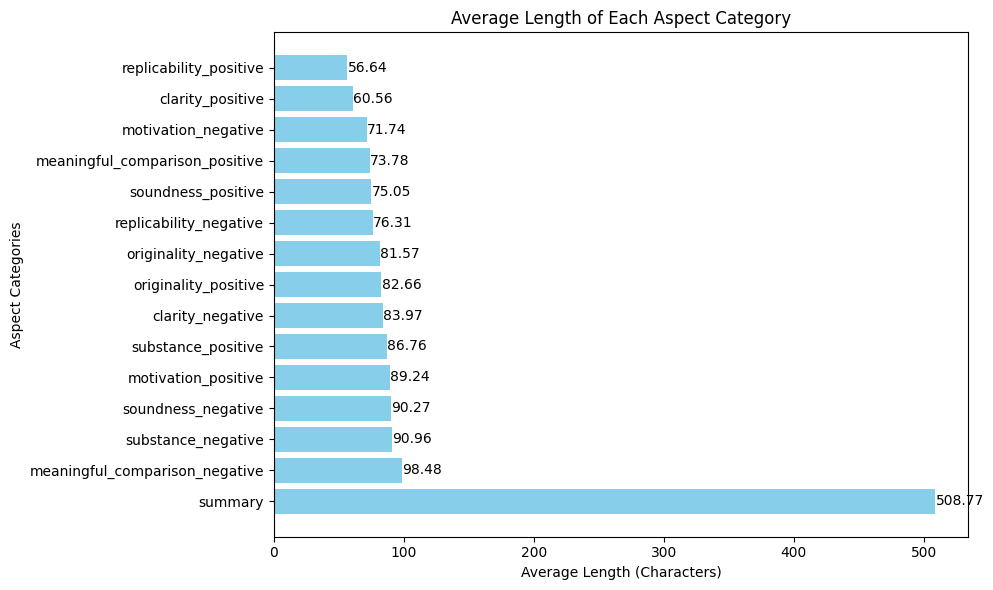

In [ ]:
# Store total length and count for each aspect
aspect_lengths = defaultdict(list)

# Iterate through the 'labels' column to calculate the lengths
for aspects_list in data['labels']:
    for item in aspects_list:
        start, end, aspect = item
        span_length = end - start
        aspect_lengths[aspect].append(span_length)

# Calculate average for each aspect
average_lengths = {aspect: sum(lengths)/len(lengths) for aspect, lengths in aspect_lengths.items()}

# Sort the average lengths in descending order for visualization
average_lengths = dict(sorted(average_lengths.items(), key=lambda x: x[1], reverse=True))

# Average length of each aspect
for aspect, avg_len in average_lengths.items():
    print(f"{aspect}: {avg_len:.2f} characters")

# Visualize the average length
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
bars = ax.barh(list(average_lengths.keys()), list(average_lengths.values()), color='skyblue')

# Add labels and title
ax.set_xlabel('Average Length (Characters)')
ax.set_ylabel('Aspect Categories')
ax.set_title('Average Length of Each Aspect Category')

# Add the average length value to each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculating the count of each aspect category

# Extract the aspects 
df['aspects'] = df['labels'].apply(lambda x: [item[2] for item in x])

# Count the aspect
all_aspects = [aspect for sublist in df['aspects'] for aspect in sublist]
aspect_counts = Counter(all_aspects)

# Display the count of each aspect
aspect_counts


Counter({'summary': 23946,
         'clarity_negative': 15697,
         'soundness_negative': 15662,
         'clarity_positive': 13095,
         'soundness_positive': 12780,
         'substance_negative': 11717,
         'originality_positive': 11606,
         'motivation_positive': 11121,
         'meaningful_comparison_negative': 9242,
         'originality_negative': 8745,
         'substance_positive': 4669,
         'replicability_negative': 4548,
         'motivation_negative': 3499,
         'meaningful_comparison_positive': 1488,
         'replicability_positive': 271})

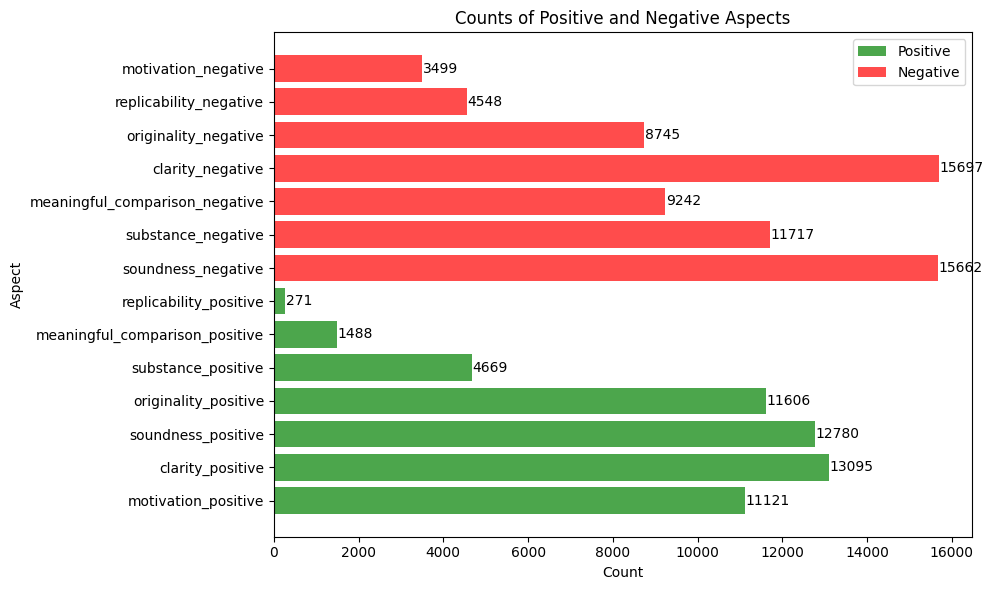

In [ ]:
# Extract the aspects 
df['aspects'] = df['labels'].apply(lambda x: [item[2] for item in x])

# Flatten all aspects
all_aspects = [aspect for sublist in df['aspects'] for aspect in sublist]

# Count the occurrences of each aspect
aspect_counts = Counter(all_aspects)

# Filter out 'summary' since it doesn't have positive or negative categories
aspect_counts.pop('summary', None)

# Initialize counters for positive and negative aspects
positive_counts = Counter()
negative_counts = Counter()

# Iterate through the aspects and separate them into positive and negative categories
for aspect, count in aspect_counts.items():
    if '_positive' in aspect:
        positive_counts[aspect] = count
    elif '_negative' in aspect:
        negative_counts[aspect] = count

# For viusalization
positive_aspects = list(positive_counts.keys())
positive_counts_values = list(positive_counts.values())

negative_aspects = list(negative_counts.keys())
negative_counts_values = list(negative_counts.values())

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for positive aspects
bars_positive = ax.barh(positive_aspects, positive_counts_values, color='green', label='Positive', alpha=0.7)

# Bar plot for negative aspects
bars_negative = ax.barh(negative_aspects, negative_counts_values, color='red', label='Negative', alpha=0.7)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Aspect')
ax.set_title('Counts of Positive and Negative Aspects')

# Add numbers on the bars for positive aspects
for bar in bars_positive:
    width = bar.get_width()
    ax.text(width + 10, bar.get_y() + bar.get_height() / 2, str(width), va='center', color='black')

# Add numbers on the bars for negative aspects
for bar in bars_negative:
    width = bar.get_width()
    ax.text(width + 10, bar.get_y() + bar.get_height() / 2, str(width), va='center', color='black')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
